## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [38]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [39]:
train, test = keras.datasets.cifar10.load_data()

In [40]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [41]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [43]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 25] 

In [44]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
results = {}

In [45]:
for i in PATIENCE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("loss_%s patience" % (i))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    earlystop_val = EarlyStopping(monitor="val_loss", 
                          patience=PATIENCE, 
                          verbose=1
                          )
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    name_tag = "loss_%s patience" % (i)
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}
    

loss_5 patience
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512  

50000/50000 [==============================] - 5s 92us/step - loss: 1.3087 - acc: 0.5454 - val_loss: 1.5081 - val_acc: 0.4723
Epoch 11/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2812 - acc: 0.5545 - val_loss: 1.4857 - val_acc: 0.4729
Epoch 12/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.2524 - acc: 0.5664 - val_loss: 1.4861 - val_acc: 0.4819
Epoch 13/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.2263 - acc: 0.5747 - val_loss: 1.4759 - val_acc: 0.4836
Epoch 14/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.1997 - acc: 0.5864 - val_loss: 1.4708 - val_acc: 0.4839
Epoch 15/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.1764 - acc: 0.5951 - val_loss: 1.4557 - val_acc: 0.4925
Epoch 16/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.1526 - acc: 0.6048 - val_loss: 1.4664 - val_acc: 0.4933
Epoch 17/50
50000/50000 [=====================

In [46]:
for i in PATIENCE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("acc_%s patience" % (i))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    earlystop_val = EarlyStopping(monitor="val_acc", 
                          patience=PATIENCE, 
                          verbose=1
                          )
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    name_tag = "acc_%s patience" % (i)
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

acc_5 patience
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512   

50000/50000 [==============================] - 5s 93us/step - loss: 1.2529 - acc: 0.5654 - val_loss: 1.4821 - val_acc: 0.4717
Epoch 13/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.2261 - acc: 0.5738 - val_loss: 1.4864 - val_acc: 0.4738
Epoch 14/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.2008 - acc: 0.5857 - val_loss: 1.4877 - val_acc: 0.4730
Epoch 15/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.1778 - acc: 0.5933 - val_loss: 1.4648 - val_acc: 0.4776
Epoch 16/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1548 - acc: 0.6023 - val_loss: 1.4793 - val_acc: 0.4839
Epoch 17/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1293 - acc: 0.6125 - val_loss: 1.4654 - val_acc: 0.4796
Epoch 18/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.1059 - acc: 0.6202 - val_loss: 1.4610 - val_acc: 0.4850
Epoch 19/50
50000/50000 [=====================

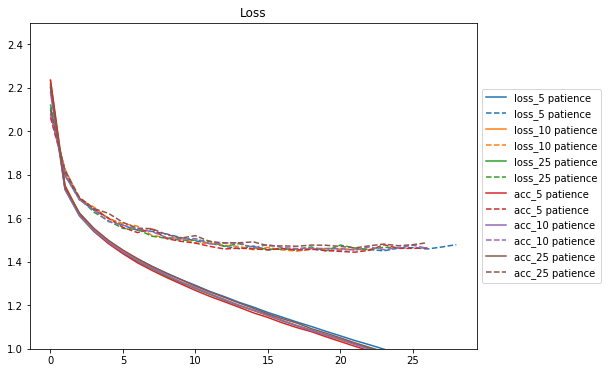

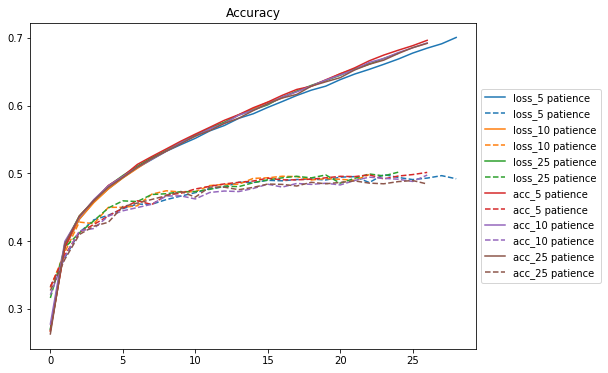

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([1, 2.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
